---
title: "Profielen"
excecute:
  eval: false
  echo: true
  output: asis
  warning: false
  error: false
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from copy import deepcopy
import pydra_core as pydra

In deze versie van Pydra is het profiel losgekoppeld van de belasting en statistiek. Hierdoor is het mogelijk om alleen een profiel te maken en overslag en oploop te berekenen zonder het koppelen van belasting en statistiek.

Er zijn drie manieren om een profiel aan te maken:
<lu>
    <li>Handmatig</li>
    <li>Import een .prfl</li>
    <li>Import een schematisatie vanuit de GEBU-GEKB tool</li>
</lu>

<h3>Profiel</h3>

Het <i>Profile</i> is de basis voor elk profiel. Als argument moet een naam voor het profiel worden opgegeven.

In [2]:
profiel = pydra.Profile("test_profiel")

<h3>Handmatig</h3>

Het <i>Profile</i> object heeft allemaal functies (startend met <i>set_...()</i>) om het profiel te veranderen. Er zijn globaal drie dingen die aan een profiel kan veranderen:
<lu>
    <li>Dijkgeometrie</li>
    <li>Voorland</li>
    <li>Voorliggende keringen</li>
</lu>

<b>Dijkgeometrie</b><br>
Voordat een profiel werkt moet een kruinhoogte, dijkorientatie en geometrie worden gedefinieerd. Een voorbeeld is gegeven in de onderstaande code.

In [3]:
# Kruinhoogte
profiel.set_dike_crest_level(8.0)

# Dijkorientatie
profiel.set_dike_orientation(90)

# Dijkgeometrie
profiel.set_dike_geometry([-6, 30], [-2, 10], [1.0, 1.0])

De <i>set_dike_geometry(x, y, r)</i> heeft drie argumenten, de x-coordinaten, de y-coordinaten, en de ruwheden. Eventueel kunnen de ruwheden worden weggelaten, er wordt dan standaard met een ruwheid van 1.0 gerekend.

In [4]:
# Dijkgeometrie
profiel.set_dike_geometry([-6, 30], [-2, 10])

Met de <i>draw_profile()</i> functie kan een plot van de doorsnede worden weergegeven.

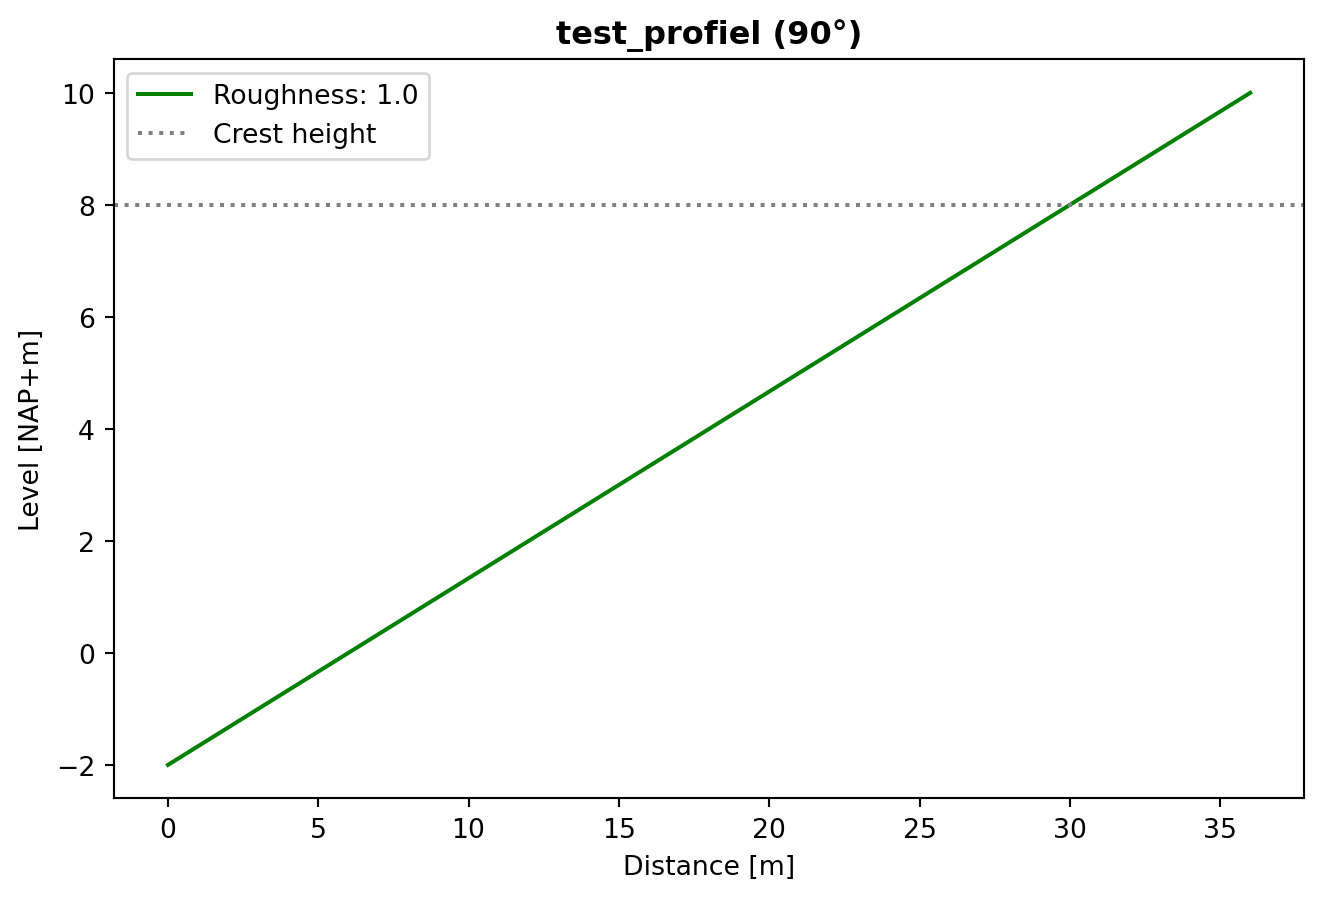

In [5]:
profiel.draw_profile()

<b>Voorland</b><br>
Een voorland kan worden toegevoegd met <i>set_foreland_geometry(x, y)</i> en heeft twee argumenten, de x-coordinaten en de y-coordinaten. Een profiel wordt altijd zo geschematiseerd dat de dijkteen op x = 0 ligt. Het voorland ligt altijd in het negatieve x-domein en de dijkgeometrie in het positieve x-domein.

In [6]:
# Voorland
profiel.set_foreland_geometry([-100, -70], [-3, -2])

Merk op dat ondanks dat we hierboven het voorland hebben gedefinieerd lopend van -100 tot -70, pydra automatisch zorgt dat het voorland aansluit op de teen van de dijk (x = 0). Het voorland wordt dus gecorrigeerd zodat deze loopt van -30 naar 0. Zie de figuur hieronder.

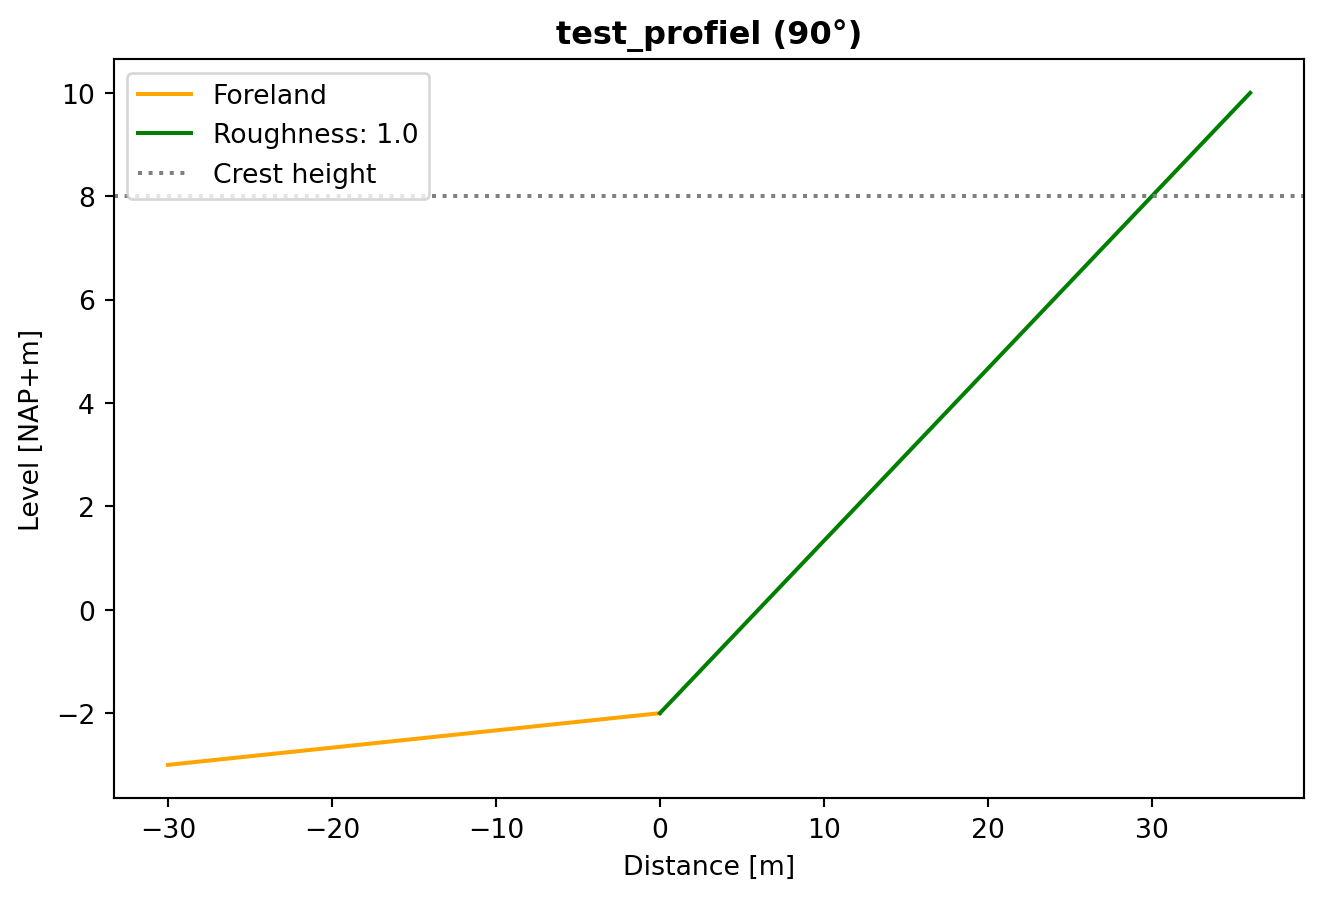

In [7]:
profiel.draw_profile()

<b>Voorliggende kering</b><br>
Een voorliggende kering, zoals een golfbreker kan worden toegevoegd met de functie <i>set_breakwater(breakwater, hoogte)</i>. De functie heeft twee argumenten, het type Breakwater (gedefinieerd via Enum) en de hoogte van de Breakwater.

In [8]:
# Importeer de Breakwater Enum
from pydra_core import Breakwater

"""
Keuzes:
Breakwater.NO_BREAKWATER
Breakwater.CAISSON
Breakwater.VERTICAL_WALL
Breakwater.RUBBLE_MOUND
"""

# Hier wordt een RubbleMound als Breakwater ingesteld met een hoogte van NAP+3,0m
profiel.set_breakwater(Breakwater.RUBBLE_MOUND, 3.0)

Dit geeft de volgende doorsnede.

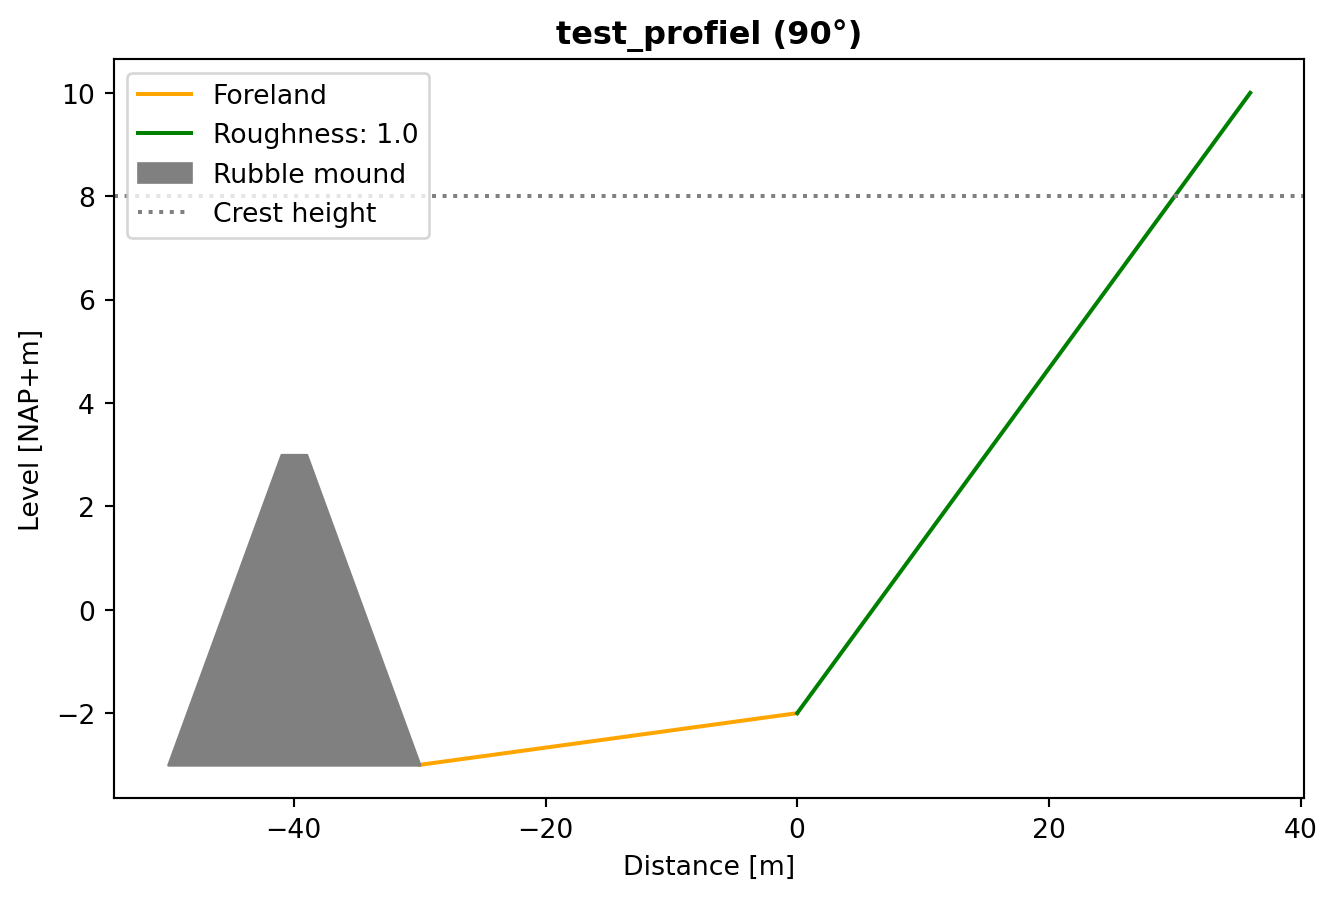

In [9]:
profiel.draw_profile()

<b>Verwijderen van een voorliggende kering/voorland</b><br>
Je kan een voorliggende kering/voorland verwijderen met de functies <i>remove_breakwater()</i> en <i>remove_foreland()</i>.

In [10]:
# Verwijder voorland
profiel.remove_breakwater()

# Verwijder voorliggende kering
profiel.remove_foreland()

Nu zonder voorland

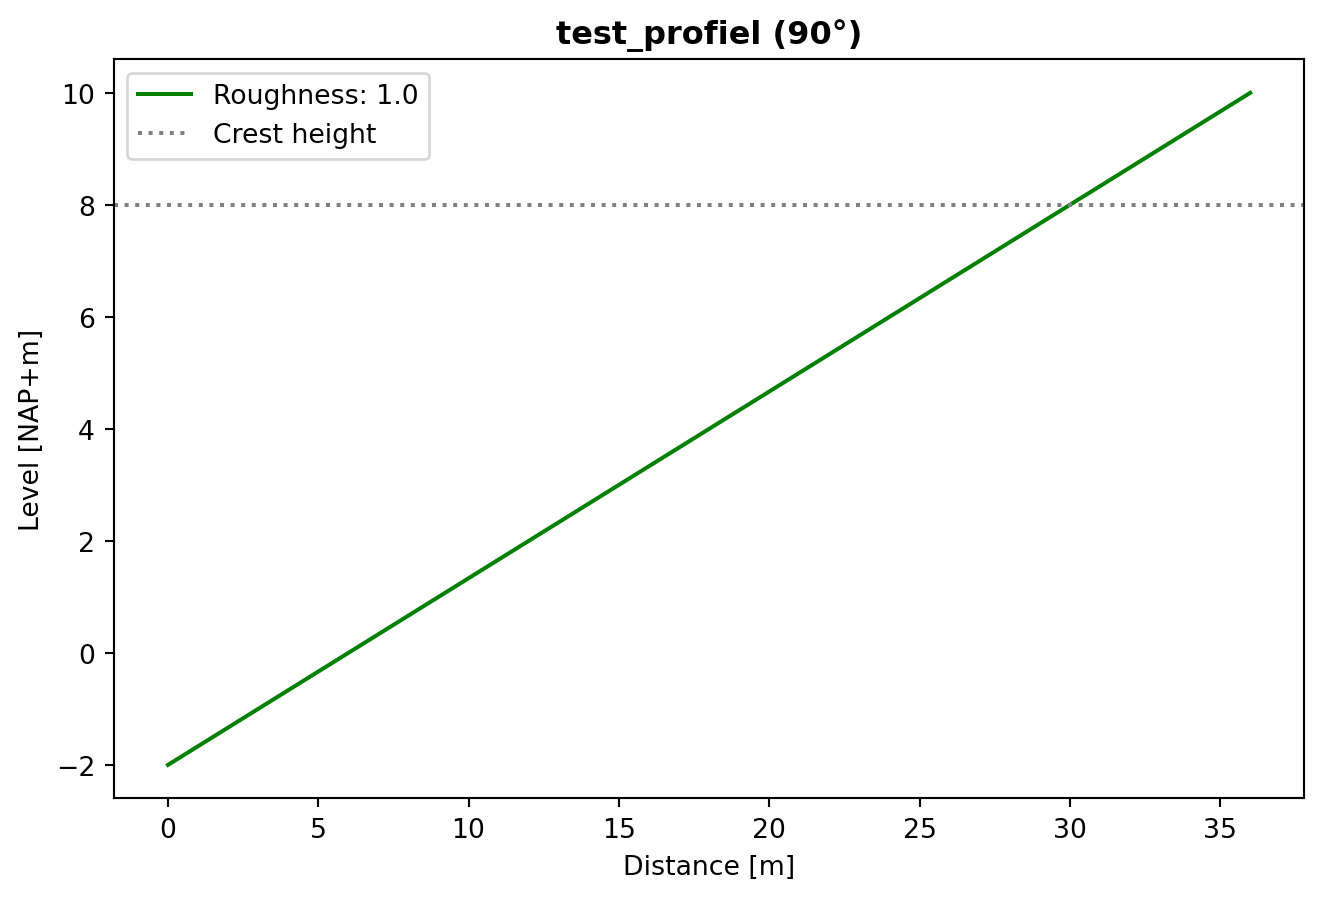

In [11]:
profiel.draw_profile()

<h3>Importeer een .prfl</h3>

In plaats van handmatig een profiel te definiëren is het ook mogelijk om een .prfl te importeren. Hiervoor kan de classmethod <i>Profile.from_prfl(prfl_path)</i> worden gebruikt. Door het optionele argument <i>name</i> te definiëren kan een naam aan het profielbestand worden gegeven.

In [12]:
PRFL_PATH = "data/profielformaat.prfl"

profiel_prfl = pydra.Profile.from_prfl(
    PRFL_PATH, profile_name="Profiel vanuit een prfl"
)

Dat geeft de volgende doorsnede:

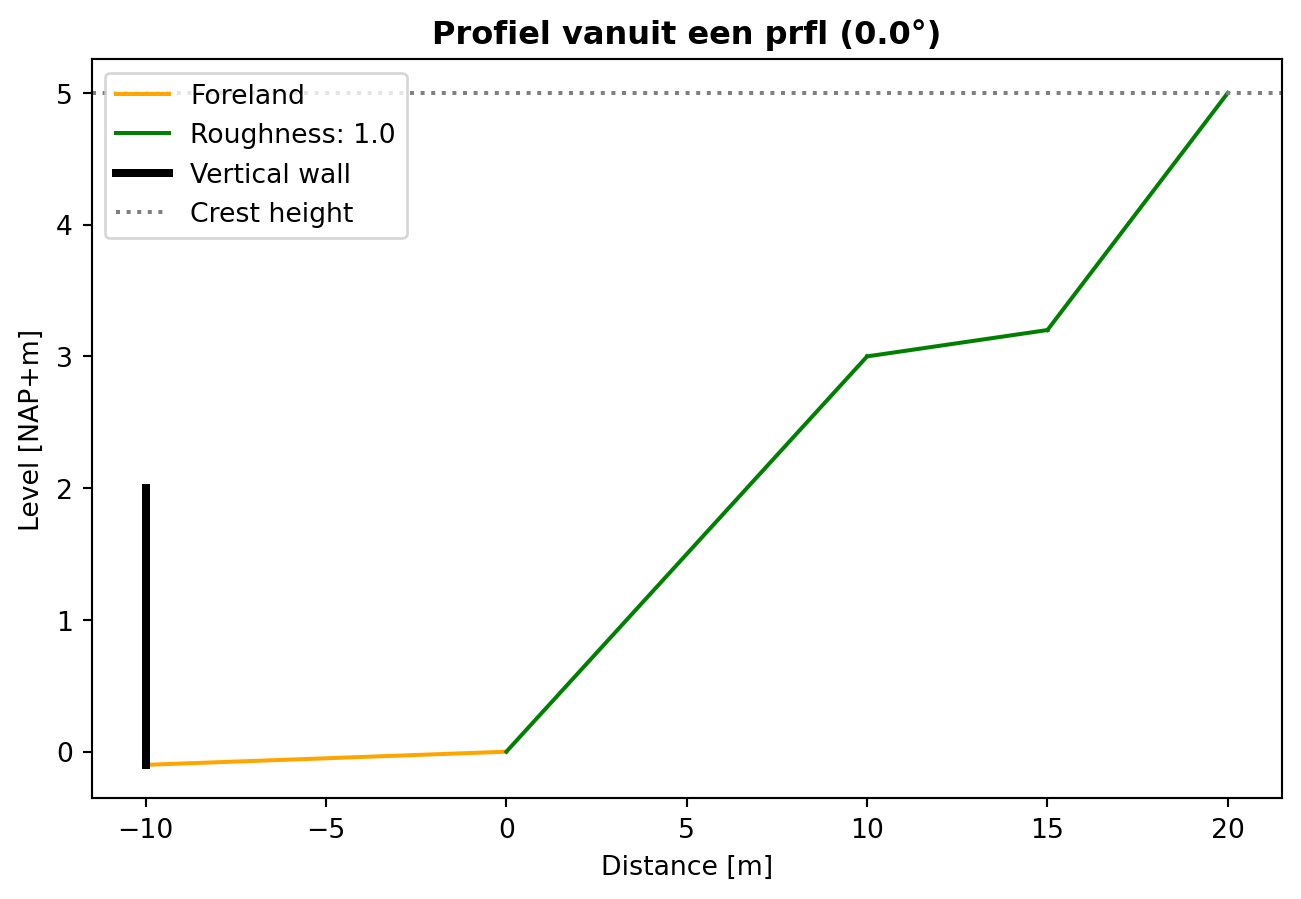

In [13]:
profiel_prfl.draw_profile()

<h3>Import een schematisatie vanuit de GEBU-GEKB tool</h3>

Het is ook mogelijk om een profiel te importeren uit de <i>1.sql</i> van de GEBU-GEKB plugin voor Hydra-Ring. Hiervoor kan de classmethod Profile.from_gebugekb_tool(sql_path) worden gebruikt. De opzet van de classmethod/functie is hetzelfde als voor het importeren van een .prfl.

In [14]:
SQL_PATH = "data/1.sql"

profiel_sql = pydra.Profile.from_gebugekb_tool(
    SQL_PATH, profile_name="Profiel vanuit een 1.sql"
)

Dat geeft de volgende doorsnede:

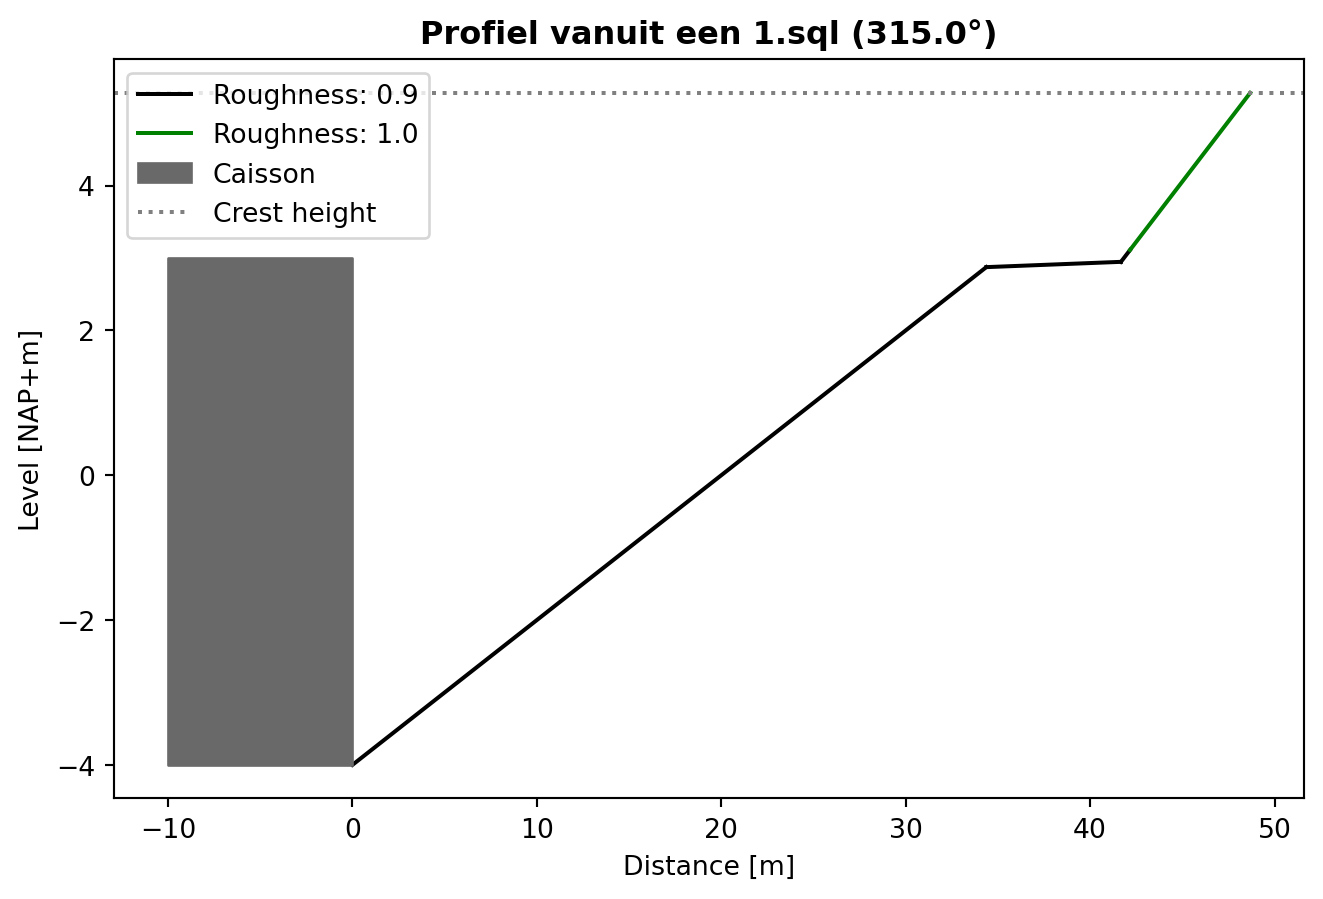

In [15]:
profiel_sql.draw_profile()

<h3>Exporteer het Profile object naar een .prfl</h3>

Het is mogelijk om een <i>Profile</i> object te exporteren naar een .prfl. Handig als je bijvoorbeeld schematisaties uit de GEBUGEKB-tool wilt omzetten naar een .prfl, of veel profielen wilt genereren met een loop.

Je kan een profiel exporteren met de functie <i>to_prfl(export_path)</i>. Het is met optionele argumenten mogelijk om een ID (toevoegen van argument <i>id = "voorbeeld_id"</i>) of een memo (toevoegen van argument <i>memo = "een memo"</i>) toe te voegen. Hieronder exporteren we de profielen die we eerder hebben geschematiseerd naar de RO1099 map.

In [16]:
# Zonder ID of memo
profiel.to_prfl("data/export_profiel_1.prfl")

# Met memo
profiel_prfl.to_prfl("data/export_profiel_2.prfl", memo="mooi profiel")

# Met ID en memo
profiel_sql.to_prfl(
    "data/export_profiel_3.prfl", id="test", memo="profiel uit de gebu-gekb tool"
)

<h3>Golftransitie over voorland</h3>

Het is mogelijk om met het Profile object de golftransitie over het voorland te bepalen. In deze demonstratie bepalen we het effect van het voorland voor het volgende profiel:

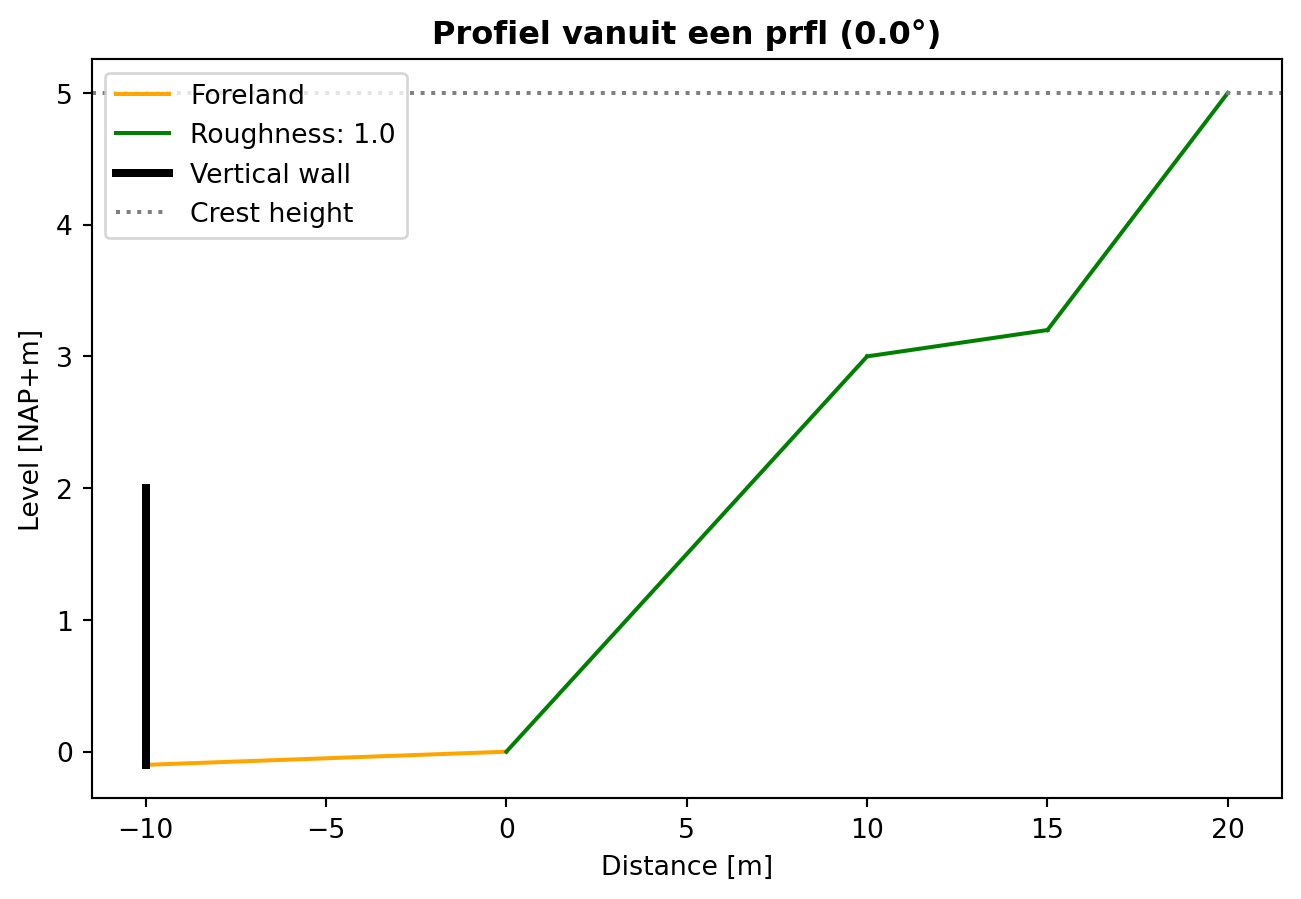

In [17]:
profiel_prfl.draw_profile()

De functie <i>transform_wave_conditions(h, hs, tspec, wdir)</i> kan gebruikt worden om de getransformeerde golfcondities te bepalen. Met het optionele argument <i>tp_tspec</i> wordt de spectrale golfperiode omgerekend naar de piekperiode (welke wordt gebruikt in de DaF module) en vervolgens weer teruggerekend naar de spectrale golfperiode. Standaard is <i>tp_tspec</i> gelijk aan 1.1.

In [18]:
#| eval: false

# HR
h = 6.0
hs = 2.0
tspec = 5.0
wdir = 84

# De invoer kunnen floats of ints zijn
_h, _hs, _tspec, _wdir = profiel_prfl.transform_wave_conditions(h, hs, tspec, wdir)

print("h", h, "->", _h)
print("hs", hs, "->", _hs)
print("tspec", tspec, "->", _tspec)
print("wdir", wdir, "->", _wdir)

Je kan ook arrays gebruiken. Merk op dat we hieronder alleen de waterstand <i>h</i> en significante golfhoogte <i>Hs</i> als arrays hebben gedefinieerd. Wanneer je een deel van de input parameters (h, hs, tspec, wdir) als array definieerd en een deel niet, vult pydra deze automatisch aan. In het onderstaande geval worden alle combinaties met een tspec van 5.0 gerekend en een wdir van 84.

In [19]:
#| eval: false

# HR
h = [3.0, 4.0, 5.0, 6.0]
hs = [2.0, 2.2, 2.4, 2.6]
tspec = 5.0
wdir = 84

# De invoer kunnen floats of ints zijn
_h, _hs, _tspec, _wdir = profiel_prfl.transform_wave_conditions(h, hs, tspec, wdir)

print("h", h, "->", _h)
print("hs", hs, "->", _hs)
print("tspec", tspec, "->", _tspec)
print("wdir", wdir, "->", _wdir)

<h3>Golfoverslag en overloop</h3>

Met een <i>Profile</i> object kan golfoverslag en overloop bepalen met de functie <i>calculate_overtopping(h, hs, tspec, wdir)</i>. Net zoals bij de golftransformatie over het voorland kan de invoer bestaan uit floats, ints, arrays of een combinatie. Hieronder wordt deze functie gedemonstreerd voor dezelfde doorsnede waarbij de golftransformatie over het voorland is gedemonstreerd (zie doorsnede hierboven).

In [20]:
#| eval: false

# HR
h = 4.0
hs = 2.0
tspec = 5.0
wdir = 84

# Overslag
qov = profiel_prfl.calculate_overtopping(h, hs, tspec, wdir)
print("qov =", qov, "m3/m/s")

Door bijvoorbeeld de waterstand als array te definieren kan heel eenvoudig het overslagdebiet geplot worden tegen de waterstand.

In [21]:
#| eval: false

# Bepaal een range aan waterstanden
h = np.arange(0.0, 6.0, 0.1)
hs = 1.0
tspec = 4.0
wdir = 84

# Overslag
qov = profiel_prfl.calculate_overtopping(h, hs, tspec, wdir)

# Plot
plt.figure()
plt.plot(h, qov, label="Overslag")
plt.axvline(5.0, ls=":", label="Kruinhoogte")
plt.title("Overslagdebiet voor verschillende waterstanden")
plt.xlabel("Waterstand [NAP+m]")
plt.xlim(0, None)
plt.ylabel("Overslagdebiet [m3/m/s]")
plt.ylim(0, None)
plt.legend(loc="best")
plt.show()

<h3>Oploophoogte</h3>

Hetzelfde is ook mogelijk voor de 2% oploophoogte. Hiervoor kan de functie <i>calculate_runup(h, hs, tspec, wdir)</i> worden gebruikt.

In [22]:
#| eval: false

# HR
h = 4.0
hs = 2.0
tspec = 5.0
wdir = 84

# Oploop
z2p = profiel_prfl.calculate_runup(h, hs, tspec, wdir)
print("z2% =", z2p, "NAP+m")

Voorbeeld voor meerdere golfhoogtes bij eenzelfde waterstand, spectrale golfperiode en hoek van golfinval.

In [23]:
#| eval: false

# Bepaal een range aan golfhoogtes
h = 4.0
hs = np.arange(0.0, 3.0, 0.1)
tspec = 5.0
wdir = 84

# Oploop
z2p = profiel_prfl.calculate_runup(h, hs, tspec, wdir)

# Plot
plt.figure()
plt.plot(hs, z2p, label="Oploophoogte")
plt.title("Oploophoogte voor verschillende golfhoogtes")
plt.xlabel("Significante golfhoogte [m]")
plt.xlim(0, None)
plt.ylabel("Oploophoogte [NAP+m]")
plt.ylim(4, None)
plt.legend(loc="best")
plt.show()

<h3>Kruinhoogte bepalen</h3>

Als laatste is het mogelijk om de kruinhoogte te bepalen gegeven een overslagdebiet. Dit kan met de functie <i>calculate_crest_level(q_critical, h, hs, tspec, wdir)</i>.

In [24]:
#| eval: false

# HR
q = 0.01
h = 4.0
hs = 2.0
tspec = 5.0
wdir = 84

# Kruinhoogte voor 10 l/m/s
hbn = profiel_prfl.calculate_crest_level(q, h, hs, tspec, wdir)
print("Benodigde kruinhoogte =", hbn, "NAP+m")

Met de overslag functie kunnen we makkelijk controleren of deze kruinhoogte klopt

In [25]:
#| eval: false

# HR
q = 0.01
h = 4.0
hs = 2.0
tspec = 5.0
wdir = 84

# Check
test_prfl = deepcopy(profiel_prfl)
test_prfl.set_dike_crest_level(hbn)
qov = test_prfl.calculate_overtopping(h, hs, tspec, wdir)

print("Check met aangepaste kruinhoogte:", round(qov, 6), "m3/m/s")

Als we dan toch bezig zijn, kunnen we een mooi grafiekje voor de kruinhoogte bepaling niet achterwege laten...

In [26]:
#| eval: false

# Bepaal een range aan overslagdebieten
q = np.arange(0.001, 0.1, 0.001)
h = 4.0
hs = 2.0
tspec = 5.0
wdir = 84

# Oploop
hbn = profiel_prfl.calculate_crest_level(q, h, hs, tspec, wdir)

# Plot
plt.figure()
plt.plot(q, hbn, label="Kruinhoogte")
plt.title("Kruinhoogte voor verschillende overslagdebieten")
plt.xlabel("Overslagdebiet [m3/m/s]")
plt.xlim(0, None)
plt.ylabel("Kruinhoogte [NAP+m]")
plt.ylim(0, None)
plt.legend(loc="best")
plt.show()